In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
import matplotlib.patches as mpatches

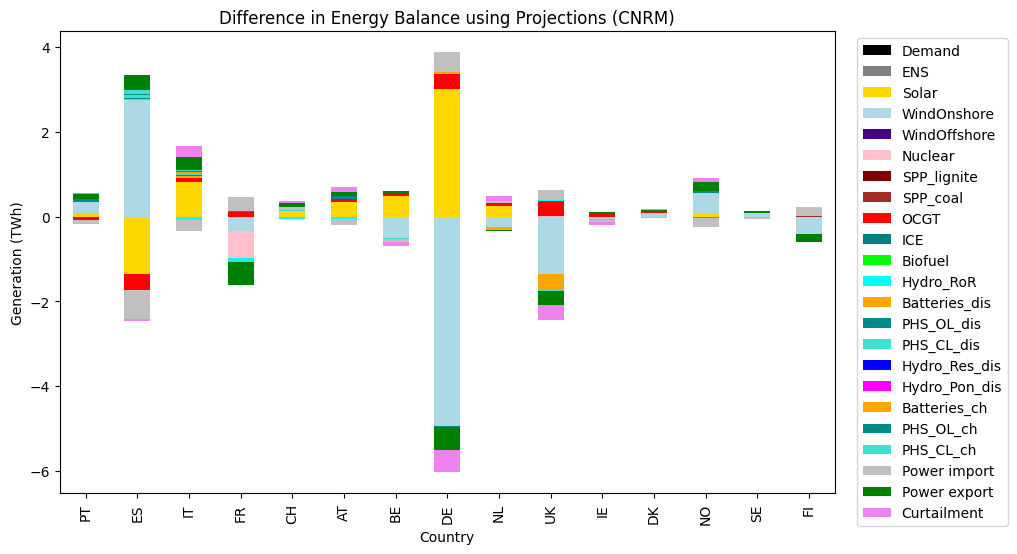

In [55]:
# Read the input CSV file
df_ref = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/GENERATION/Average_Generation_CNRM_1986_2015.csv')
df_model1 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/GENERATION/Average_Generation_CNRM_2016_2045.csv')
df_model2 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/GENERATION/Average_Generation_EARTH_2016_2045.csv')
df_model3 = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/GENERATION/Average_Generation_HadGEM_2016_2045.csv')

# Set the first column as the index
df_ref.set_index('Power', inplace=True)
df_model1.set_index('Power', inplace=True)
df_model2.set_index('Power', inplace=True)
df_model3.set_index('Power', inplace=True)

# Substract the reference values from models
df_sub1 = df_model1.abs().iloc[:, :].sub(df_ref.abs().iloc[:, :])
df_sub2 = df_model2.abs().iloc[:, :].sub(df_ref.abs().iloc[:, :])
df_sub3 = df_model3.abs().iloc[:, :].sub(df_ref.abs().iloc[:, :])

# Define dataframe to be plotted
df = df_sub1

# Operation on Dataframe
df = df.transpose()
df = df / 1000000   #from MWh to TWh 

# Dictionary to map a technology with a color
colors = {
    "Demand": "black",
    "ENS": "gray",
    "Solar": "gold",
    "WindOnshore": "lightblue",
    "WindOffshore": "indigo",
    "Nuclear": "pink",
    "SPP_lignite": "maroon",
    "SPP_coal": "brown",
    "OCGT": "red",
    "ICE": "teal",
    "Biofuel": "lime",
    "Hydro_RoR": "cyan",
    "Batteries_dis": "orange",
    "PHS_OL_dis": "darkcyan",
    "PHS_CL_dis": "turquoise",
    "Hydro_Res_dis": "blue",
    "Hydro_Pon_dis": "magenta",
    "Batteries_ch": "orange",
    "PHS_OL_ch": "darkcyan",
    "PHS_CL_ch": "turquoise",
    "Hydro_Res_ch": "blue" ,
    "Hydro_Pon_ch": "magenta",
    "Power import": "silver",
    "Power export": "green",
    "Curtailment": "violet" 
}

'''
# Group storage technologies together and update the legend labels
grouped_technologies = {}
for technology in df.columns:
    for key, value in storage_colors.items():
        if technology.endswith(key):
            grouped_technology = key.replace('_dis', '').replace('_ch', '')
            df[grouped_technology] = df.get(technology, 0) + df.get(grouped_technology, 0)
            #df.drop(technology, axis=1, inplace=True)
            grouped_technologies[grouped_technology] = value
'''

# Plot stacked bar chart for each country
fig, ax = plt.subplots(figsize=(10, 6))
df_plot = df.drop(columns=["Hydro_Pon_ch", "Hydro_Res_ch"])  # Exclude Hydro_Pon_ch and Hydro_Res_ch from the plot
df_plot.plot(kind='bar', stacked=True, ax=ax, color=[colors.get(col, 'white') for col in df_plot.columns])

#ax.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Zero line

# Set labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Generation (TWh)')
#ax.set_title('Generation by Technology')
ax.set_title('Difference in Energy Balance using Projections (CNRM)')

# Move the legend outside the graph
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.show()


In [ ]:
# Read the input CSV file
df = pd.read_csv('/Users/henryverdoodt/Documents/CODE/DATA/GENERATION/Average_Generation_CNRM_1986_2015.csv')

# Set the first column as the index
df.set_index('Power', inplace=True)

# Remove the 'Power import', 'Power export', and 'Curtailment' rows
#df = df.loc[~df.index.isin(['Power import', 'Power export', 'Curtailment'])]

# Transpose the DataFrame to have countries as columns and technologies as rows
df = df.transpose()

# Plot stacked bar chart for each country
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Generation')
ax.set_title('Generation by Technology')

# Show the plot
plt.show()
